# **Regular expressions**

Natural language processing is a massive field of study and actively used practice which aims to make sense of language using statistics and computers.

NLP is mostly used in topic identification and text classification. Some interesting NLP areas you might have heard about are: topic identification, chatbots, text classification, translation, sentiment analysis. There are also many more! 

Regular expression: Regular expressions are strings you can use that have a special syntax, which allows you to match patterns and find other strings. A pattern is a series of letters or symbols which can map to an actual text or words or punctuation. 

Regular expressions are often referred to as regex and can be used easily with python via the `re` library.

In [8]:
import re
re.match('abc', 'abcdef')

<re.Match object; span=(0, 3), match='abc'>

Common regex patterns:

pattern
matches
example
\w+
word
‘Magic’
\d
digit
9
\s
space
‘ ‘
.*
wildcard
‘username74’
* or +
greedy match (grab repeats of single letters)
‘aaaaa’
\S
not space
‘no_spaces’
[a-z]
lowercase group
‘abcdefg’

re module (we pass the pattern first and the string second):
- **split**: split a string on regex
- **findall**: find all patterns in a string
- **search**: search for a pattern
- **match**: match an entire string or substring based on a pattern

In [9]:
re.split('\s+', 'Split on spaces')

['Split', 'on', 'spaces']

In [10]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']
['Let', 'RegEx', 'Won', 'Can', 'Or']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']
['4', '19']


# **Tokenization**

Tokenization is the process of transforming a string or document into smaller chunks, which we call tokens. This is usually one step in the process of preparing a text for natural language processing. There are many different theories and rules regarding tokenization, normally tokenization will do things like break out words or sentences, often separate punctuation or you can even just tokenize parts of a string like separating all hashtags in a Tweet.

nltk library

One library that is commonly used for simple tokenization is nltk, the natural language toolkit library.

In [11]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/carlosperezricardo/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/carlosperezricardo/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/carlosperezricardo/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/carlosperezricardo/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/carlosperezricardo/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/carlosperezricardo/nltk_data

True

In [55]:
from nltk.tokenize import word_tokenize
import pandas as pd 

word_tokenize("Hi there!")

['Hi', 'there', '!']

In [14]:
word_tokenize("I don't like Sam's shoes")

['I', 'do', "n't", 'like', 'Sam', "'s", 'shoes']

The sentence is: I don't like Sam's shoes. When we tokenize it we can clearly see the negation in the not and we can see possession with the 's. These indicators can help us determine meaning from simple text.

NLTK has plenty of other tokenizers you can use, including these ones you'll be working with in this chapter. 

- The **sent_tokenize** function will split a document into individual sentences. 
- The **regexp_tokenize** uses regular expressions to tokenize the string, giving you more granular control over the process. 
- The **tweettokenizer** does neat things like recognize hashtags, mentions and when you have too many punctuation symbols following a sentence.

In [31]:
# Import necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize

text = """A newly discovered asteroid is sticking close to our sun -- much closer than our own planet Earth.
The asteroid, called 2021 PH27, completes an orbit around the sun every 113 days.
That gives this space rock the distinction of having the shortest known orbital period for an asteroid. 
Note: And only the second shortest orbit around the sun after Mercury: which takes [88 days] to complete its orbital journey around our star."""

# Split text into sentences: sentences
sentences = sent_tokenize(text)
sentences

['A newly discovered asteroid is sticking close to our sun -- much closer than our own planet Earth.',
 'The asteroid, called 2021 PH27, completes an orbit around the sun every 113 days.',
 'That gives this space rock the distinction of having the shortest known orbital period for an asteroid.',
 'Note: And only the second shortest orbit around the sun after Mercury: which takes [88 days] to complete its orbital journey around our star.']

In [32]:
# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])
print(tokenized_sent)

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(text))
print(unique_tokens)

# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*\]" 

# We look for patterns that start with [ , so \[ and can have text in the middle .* (. anything, * repeats previous, so repeat anything, and end wiht ], so \] . 

# Use re.search to find the first text in square brackets
print(re.search(pattern1, text))


# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w+]+:"
print(re.match(pattern2, sentences[3]))

['Note', ':', 'And', 'only', 'the', 'second', 'shortest', 'orbit', 'around', 'the', 'sun', 'after', 'Mercury', ':', 'which', 'takes', '[', '88', 'days', ']', 'to', 'complete', 'its', 'orbital', 'journey', 'around', 'our', 'star', '.']
{'of', 'called', ']', 'after', 'Mercury', 'asteroid', 'distinction', 'known', '113', 'gives', 'only', 'shortest', 'the', '[', 'completes', 'rock', 'which', 'sun', 'every', 'planet', 'second', 'star', 'orbit', '--', 'much', 'having', 'journey', 'sticking', 'newly', 'Note', 'days', 'than', 'complete', 'And', 'an', ':', 'to', '2021', 'takes', 'space', '88', 'That', 'PH27', 'closer', 'is', 'around', 'close', 'A', 'this', 'The', 'its', 'our', 'Earth', 'discovered', '.', 'for', 'period', 'own', 'orbital', ','}
<re.Match object; span=(369, 378), match='[88 days]'>
<re.Match object; span=(0, 5), match='Note:'>


## **Difference between search and match**

Learning when to use search versus match can be challenging, so let's take a look at how they are different. 

When we use search and match with the same pattern and string with the pattern is at the beginning of the string, we see we find identical matches. That is the case with matching and searching abcde with the pattern abc. 

When we use search for a pattern that appears later in the string we get a result, but we don't get the same result using match. This is because match will try and match a string from the beginning until it cannot match any longer. Search will go through the ENTIRE string to look for match options. 

If you need to find a pattern that might not be at the beginning of the string, you should use search. If you want to be specific about the composition of the entire string, or at least the initial pattern, then you should use match.

In [34]:
import re
print(re.match('abc', 'abcde'))
print(re.search('abc', 'abcde'))
print(re.match('cd', 'abcde'))
print(re.search('cd', 'abcde'))


<re.Match object; span=(0, 3), match='abc'>
<re.Match object; span=(0, 3), match='abc'>
None
<re.Match object; span=(2, 4), match='cd'>


In regex, OR is represented by the pipe character “|”. To use the or, you can define a group using parenthesis (). Groups can be either a pattern or a set of characters you want to match. You can also define explicit character classes using square brackets []. 

We want to find all digits and words:

In [39]:
import re
match_digits_and_words = ( '(\d+|\w+)' )
re.findall(match_digits_and_words, 'Does he have 11 cats? Yes, he does.')

['Does', 'he', 'have', '11', 'cats', 'Yes', 'he', 'does']

Regex ranges and groups:
	pattern matches 
example


pattern
matches
example
[A-Za-z]+
upper and lowercase English alphabet
'ABCDEFghijk'
[0-9]
numbers from 0 to 9
9
[A-Za-z\-\.]+
upper and lowercase English alphabet , -and .
'My-Website.com'


(a-z)
a, - and z
'a-z'
(\s+l,)
spaces or a comma
','

In [41]:
tweets = ["@adamsconsulting The plane was from Amsterdam so there's a strong possibility there are many Dutch passengers in that plane."]

In [42]:
# Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer
# Write a pattern that matches both mentions (@) and hashtags
pattern2 = r"([@#]\w+)"
# Use the pattern on the last tweet in the tweets list
mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print(mentions_hashtags)

['@adamsconsulting']


## **Chart word length**

Find length of words in a sentence.

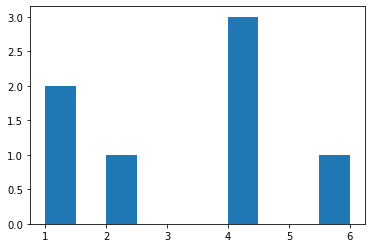

In [43]:
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
words = word_tokenize("This is a pretty cool tool!")
word_lengths = [len(w) for w in words]
plt.hist(word_lengths)
plt.show()

# **Bag of words**

Bag of words is a very simple and basic method to finding topics in a text. For bag of words, you need to first create tokens using tokenization, and then count up all the tokens you have. The theory is that the more frequent a word or token is, the more central or important it might be to the text. Bag of words can be a great way to determine the significant words in a text based on the number of times they are used.

In [46]:
article = """ Everything we express (either verbally or in written) carries huge amounts of information. The topic we choose, our tone, our selection of words, everything adds some type of information that can be interpreted and value extracted from it. In theory, we can understand and even predict human behaviour using that information.

But there is a problem: one person may generate hundreds or thousands of words in a declaration, each sentence with its corresponding complexity. If you want to scale and analyze several hundreds, thousands or millions of people or declarations in a given geography, then the situation is unmanageable.

Data generated from conversations, declarations or even tweets are examples of unstructured data. Unstructured data doesn’t fit neatly into the traditional row and column structure of relational databases, and represent the vast majority of data available in the actual world. It is messy and hard to manipulate. Nevertheless, thanks to the advances in disciplines like machine learning a big revolution is going on regarding this topic. Nowadays it is no longer about trying to interpret a text or speech based on its keywords (the old fashioned mechanical way), but about understanding the meaning behind those words (the cognitive way). This way it is possible to detect figures of speech like irony, or even perform sentiment analysis."""

In [49]:
from nltk.tokenize import word_tokenize
from collections import Counter
counter = Counter(word_tokenize("""The cat is in the box. The cat likes the box.
                The box is over the cat."""))
counter.most_common(2)

[('The', 3), ('cat', 3)]

In [56]:
# Tokenize the article: tokens
tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[(',', 12), ('.', 11), ('of', 9), ('the', 9), ('or', 7), ('in', 6), ('and', 6), ('is', 6), ('a', 5), ('to', 5)]


The bag of words model is a procedure of extracting word tokens from a text document (henceforth, we will refer to this as just document), computing the frequency of these word tokens and constructing a word vector based on these frequencies and the vocabulary of the entire corpus of documents.

In [52]:
corpus = ["The lion is the King of the Jungle.", "Lions are carnivors.","Lions live in the African Sabanna"]

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)
print(bow_matrix.toarray())

[[0 0 0 0 1 1 1 1 0 0 1 0 3]
 [0 1 1 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 1]]


CountVectorizer automatically lowercases words and ignores single character tokens such as 'a'. Also, it doesn't necessarily index the vocabulary in alphabetical order.

**Mapping feature indices with feature names**

In [59]:
vectorizer = CountVectorizer()

bow_matrix = vectorizer.fit_transform(corpus)
bow_df = pd.DataFrame(bow_matrix.toarray())

# Map the column names to vocabulary 
bow_df.columns = vectorizer.get_feature_names()

display(bow_df)

,african,are,carnivors,in,is,jungle,king,lion,lions,live,of,sabanna,the
0,0,0,0,0,1,1,1,1,0,0,1,0,3
1,0,1,1,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,1,1,0,1,1
